<div>
    <img src="headerbox.png" style="width:100%">
</div>

<b>Out-of-the-box outside-of-the-box thinking with</b>
<h1>BraketLab</h1>

---

<b>Developed for the <a href="https://www.mn.uio.no/ccse/english/about/news-and-events/events/the-bi-weekly-odd-seminar-series-at-ccse/">ODD-seminar at the CCSE</a> by</b> Audun Skau Hansen <a href="mailto:a.s.hansen@kjemi.uio.no">✉️</a> at the Department of Chemistry, The Hylleraas Centre for Quantum Molecular Sciences, University of Oslo (2021)</h4>

Access the padlet below: <a href="shorturl.at/cxyzO">shorturl.at/cxyzO</a>

In [1]:
from IPython.display import IFrame
IFrame("https://uio.padlet.org/audunskauhansen/xswuiajgknxn414z", width = 1000, height= 800)

<div>
    <img src="beyond_planck2.png" style="width:100%">
</div>

Quantum theory is riddled with abstract and complex topics, which for many students takes some time to digest. Familiar themes from linear algebra may be obfuscated by unfamiliar notation, and enforcing the rules and logic of quantum mechanics requires the students to actively recollect and understand theory.

<b>BraketLab</b> is a tool for accelerated learning of quantum theory. It provides an algebraic framework where the notation and logic of quantum mechanics are automatically enforced, thus allowing students to build intuition by means of exploration. With an object-oriented focus and operator overloading, the abstract concepts of quantum mechanics can be made more concrete and tangible, expressed in a language familiar to students competent in programming. It may not be <i>the path</i> into quantum theory for everyone, but in many ways it opens new perspectives, thus making the content more accessible to a larger audience. 

This Notebook will take you on a tour through most of the functionality of BraketLab as of december 2021. Let's begin by importing our required modules:

In [2]:
import numpy as np # Numpy for numerics
import sympy as sp # We need sympy for defining our functions
import matplotlib.pyplot as plt # Matplotlib for visualization

import braketlab as bk # <- pip install braketlab (if you don't have it) 

sp.init_printing() # <- pretty display of mathematical expressions
%matplotlib notebook

## Bra-ket notation

Quantum mechanics is commonly expressed in Bra-Ket notation, often named <i>Dirac notation</i>, after Paul Dirac who introduced the formalism in a <a href="https://www.ifsc.usp.br/~lattice/wp-content/uploads/2014/02/Dirac_notation.pdf">surprisingly short paper</a> back in 1939. This notation allows for a very compact and convenient mathematical treatment of quantum theory.

It is built around the concept of a <b>Hilbert space</b>, in which a certain <b>linear vector space</b> is combined with a specific <b>inner product</b>. This space is spanned by so-called <b>kets</b>:
\begin{equation}
\vert a \rangle = \sum_{i=1}^3 \vert u_i \rangle a_i,
\end{equation}
which, in fact, is the same thing as a vector
\begin{equation}
\mathbf{a}
  =
  \begin{pmatrix}
    a_1 \\
    a_2 \\
    a_3
  \end{pmatrix}
  =
  \begin{pmatrix}
    1 \\
    0 \\
    0
  \end{pmatrix}
  a_1
  +
  \begin{pmatrix}
    0 \\
    1 \\
    0
  \end{pmatrix}
  a_2
  +
  \begin{pmatrix}
    0 \\
    0 \\
    1
  \end{pmatrix}
  a_3
  =
  \mathbf{u}_1a_1 + \mathbf{u}_2a_2 + \mathbf{u}_3a_3
  =
  \sum_{i=1}^3 \mathbf{u}_ia_i
\end{equation}
A feature of the kets that many may find unfamiliar is that they can be constructed from functions. 

Where you would normally have Euclidean vectors such as:

<IPython.core.display.Javascript object>


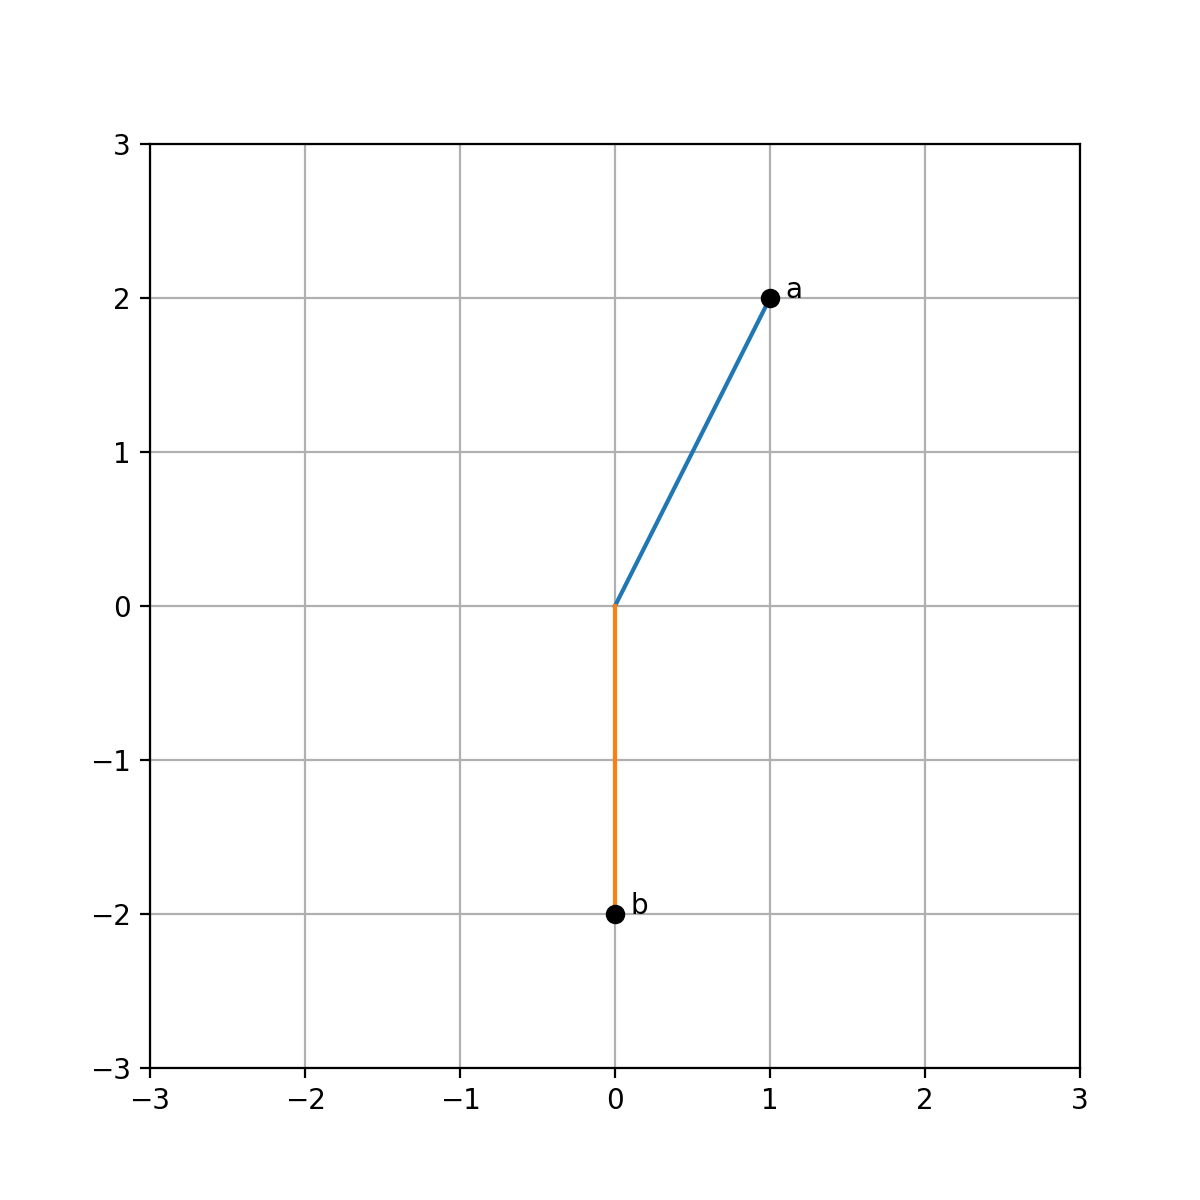

In [3]:
a = bk.ket([1.0,2], name = "a") # <- just like np.array([1.0, 2])
b = bk.ket([0,-2], name = "b")
bk.show(a,b) # <- visualize

the kets allows you to define something like

<IPython.core.display.Javascript object>


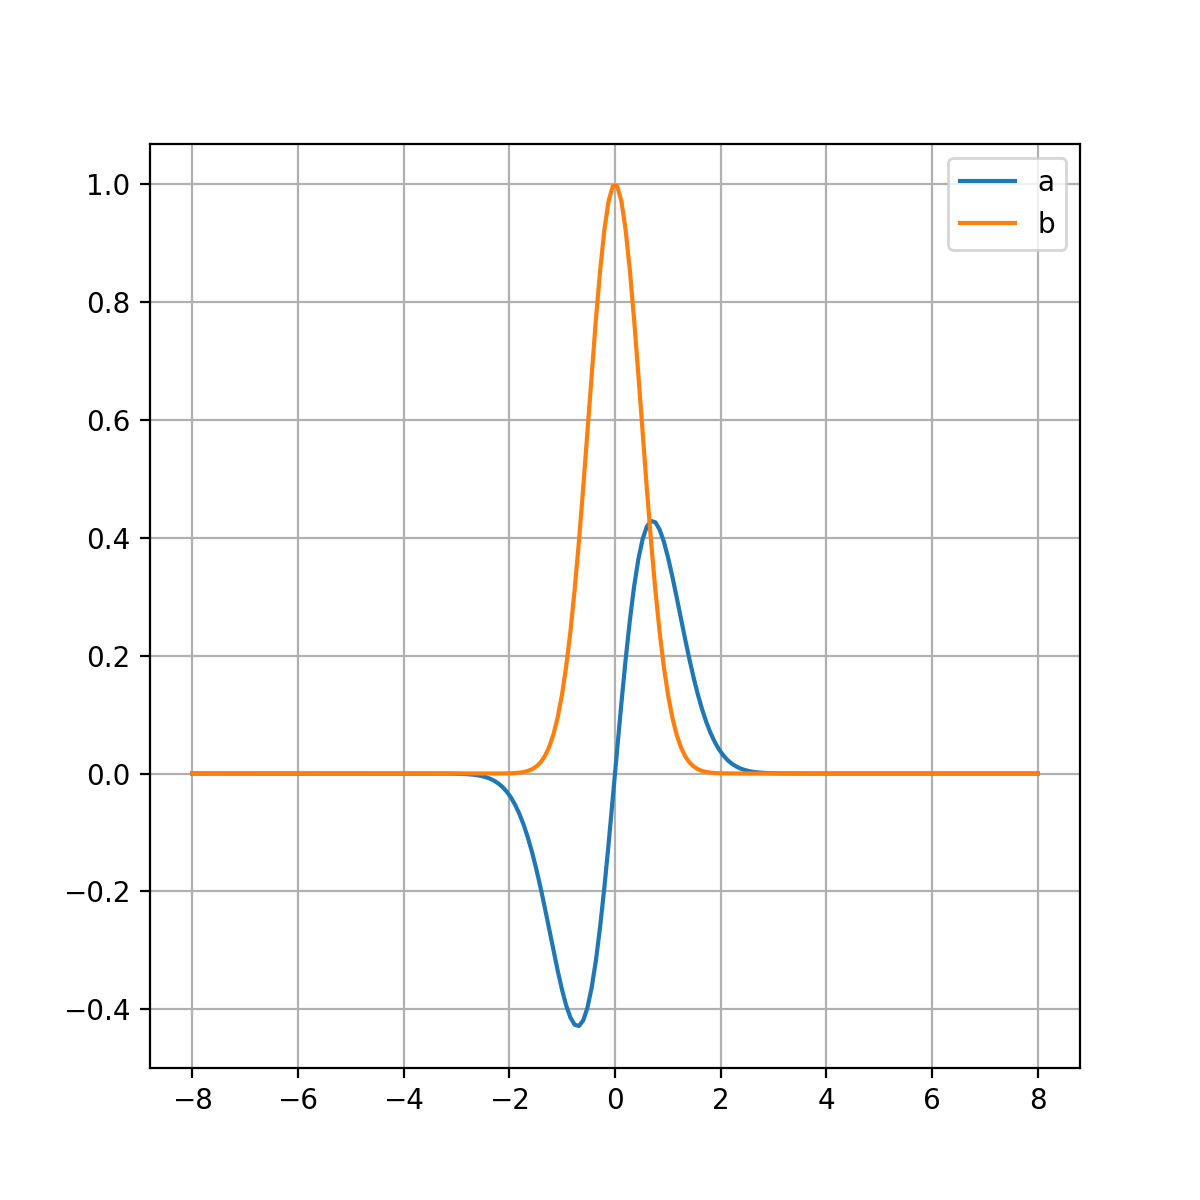

In [4]:
x = sp.symbols("x") # <- symbolic 'x' from sympy

a = bk.ket( x*sp.exp(-x**2), name = "a" )
b = bk.ket( sp.exp(-2*x**2), name = "b" )
bk.show(a,b)

Of course, the functions can be of arbitrary dimensionality, such as two:

<IPython.core.display.Javascript object>


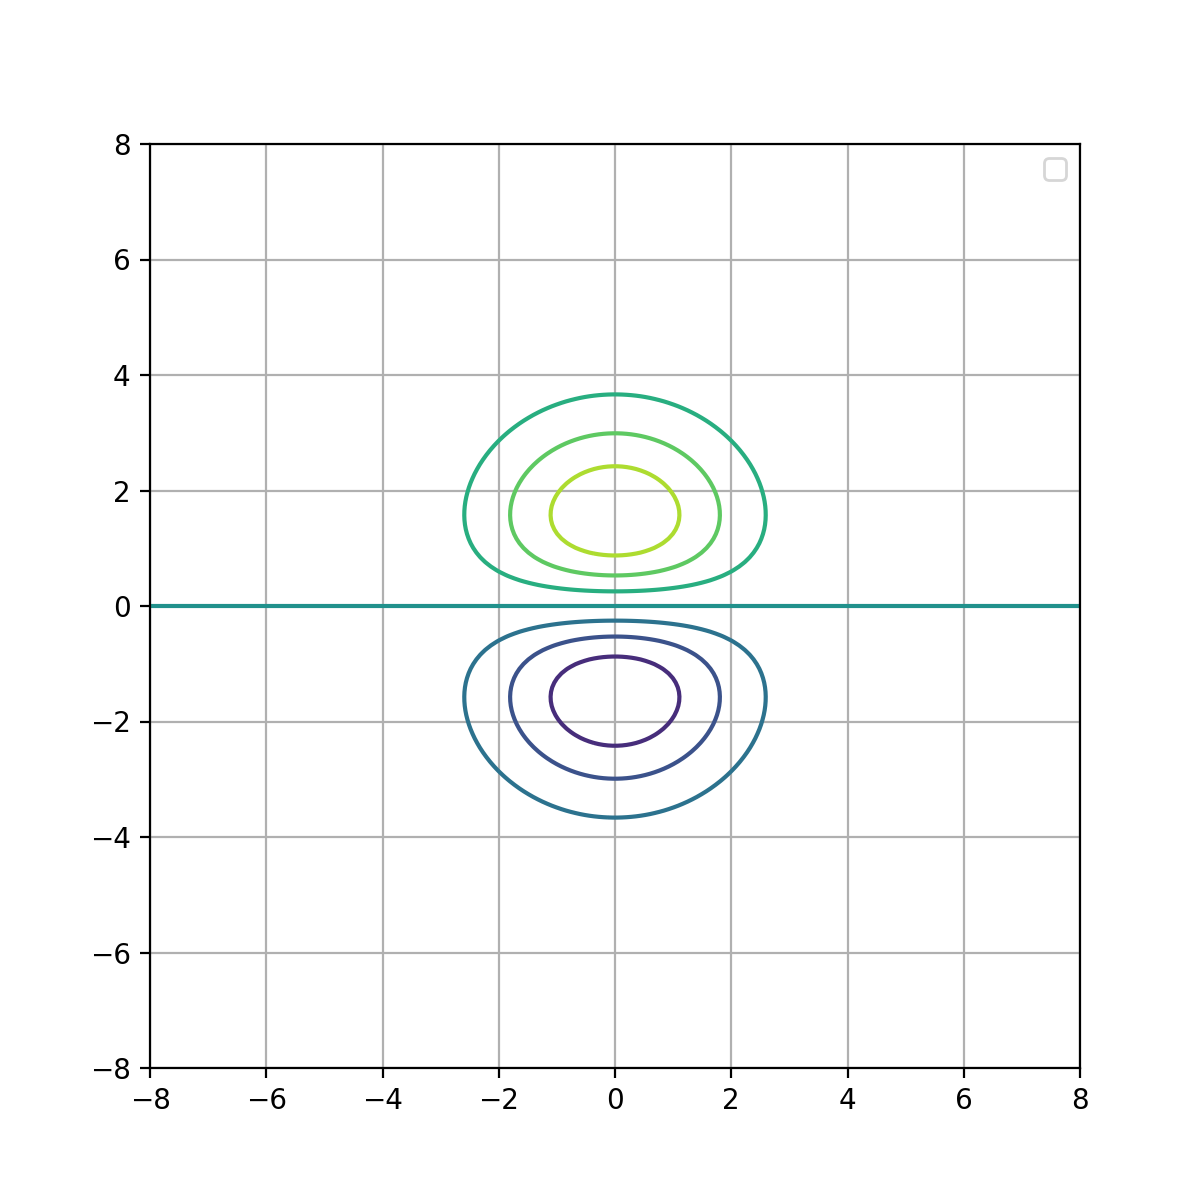

No handles with labels found to put in legend.


In [5]:
x,y = sp.symbols("x y")
a = bk.ket( x*sp.exp(-.2*(x**2 + y**2)), name = "a") # A 2D ket
bk.show(a)

...or five (which is hard to visualize):

In [6]:
x,y,z,p,q = sp.symbols("x y z p q")

a = bk.ket( sp.exp(-(2*x**2 + y**2 + z**2 + p**2 + q**2)) )

You may furthermore <i>evaluate</i> these functions in points:

In [7]:
a(.1,0,2,.1,.1)

...or over ranges and grids:

In [8]:
a(np.linspace(-1,1,100), 0,0,0,0)

array([0.36787944, 0.38289132, 0.39819064, 0.4137634 , 0.42959439,
       0.44566718, 0.46196408, 0.47846622, 0.4951535 , 0.51200469,
       0.5289974 , 0.54610814, 0.56331234, 0.58058444, 0.5978979 ,
       0.61522529, 0.63253831, 0.64980792, 0.66700437, 0.68409729,
       0.70105577, 0.71784846, 0.73444367, 0.75080943, 0.76691364,
       0.7827241 , 0.79820872, 0.81333551, 0.82807279, 0.84238922,
       0.85625398, 0.8696368 , 0.88250816, 0.89483932, 0.90660247,
       0.91777082, 0.92831871, 0.9382217 , 0.94745666, 0.95600187,
       0.96383711, 0.97094371, 0.97730466, 0.98290467, 0.98773022,
       0.99176959, 0.99501299, 0.99745249, 0.99908215, 0.99989797,
       0.99989797, 0.99908215, 0.99745249, 0.99501299, 0.99176959,
       0.98773022, 0.98290467, 0.97730466, 0.97094371, 0.96383711,
       0.95600187, 0.94745666, 0.9382217 , 0.92831871, 0.91777082,
       0.90660247, 0.89483932, 0.88250816, 0.8696368 , 0.85625398,
       0.84238922, 0.82807279, 0.81333551, 0.79820872, 0.78272

(which in this case corresponds to computing the integral $\int_{\mathbb{R}^n} \delta(\mathbf{r}-\mathbf{r}') a(\mathbf{r}') d\mathbf{r}'$)

## Bra-ket algebra

Just as you can do all sorts of algebra on Euclidean vectors:

<IPython.core.display.Javascript object>


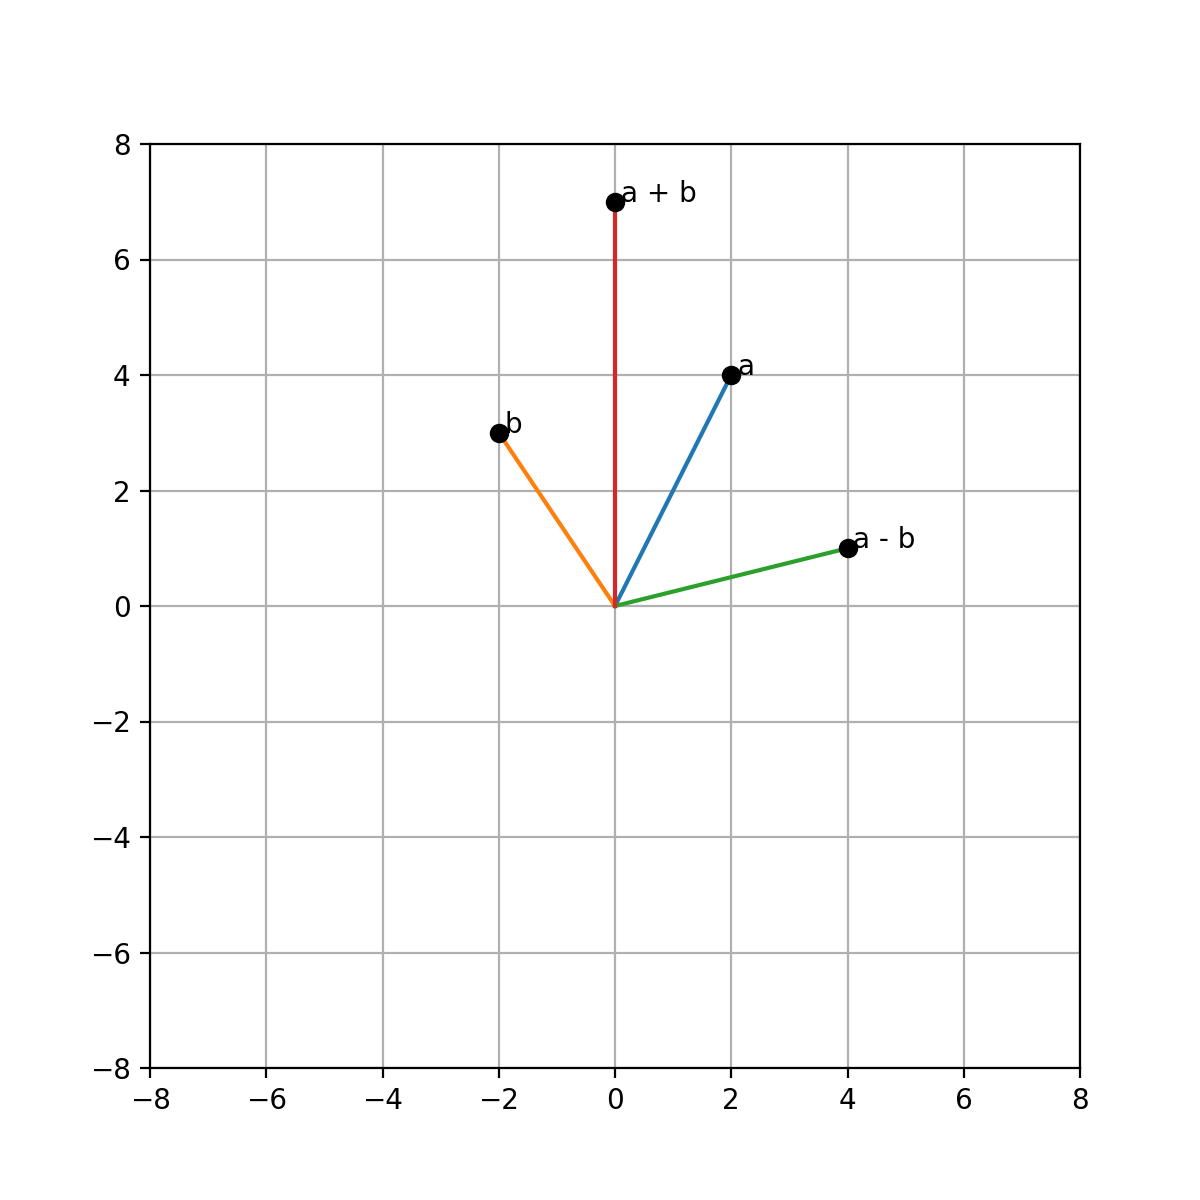

In [9]:
a = bk.ket([ 2,4], name = "a")
b = bk.ket([-2,3], name = "b")

bk.show(a, b, a-b, a+b)

the same can be done to the more abstract kets:

<IPython.core.display.Javascript object>


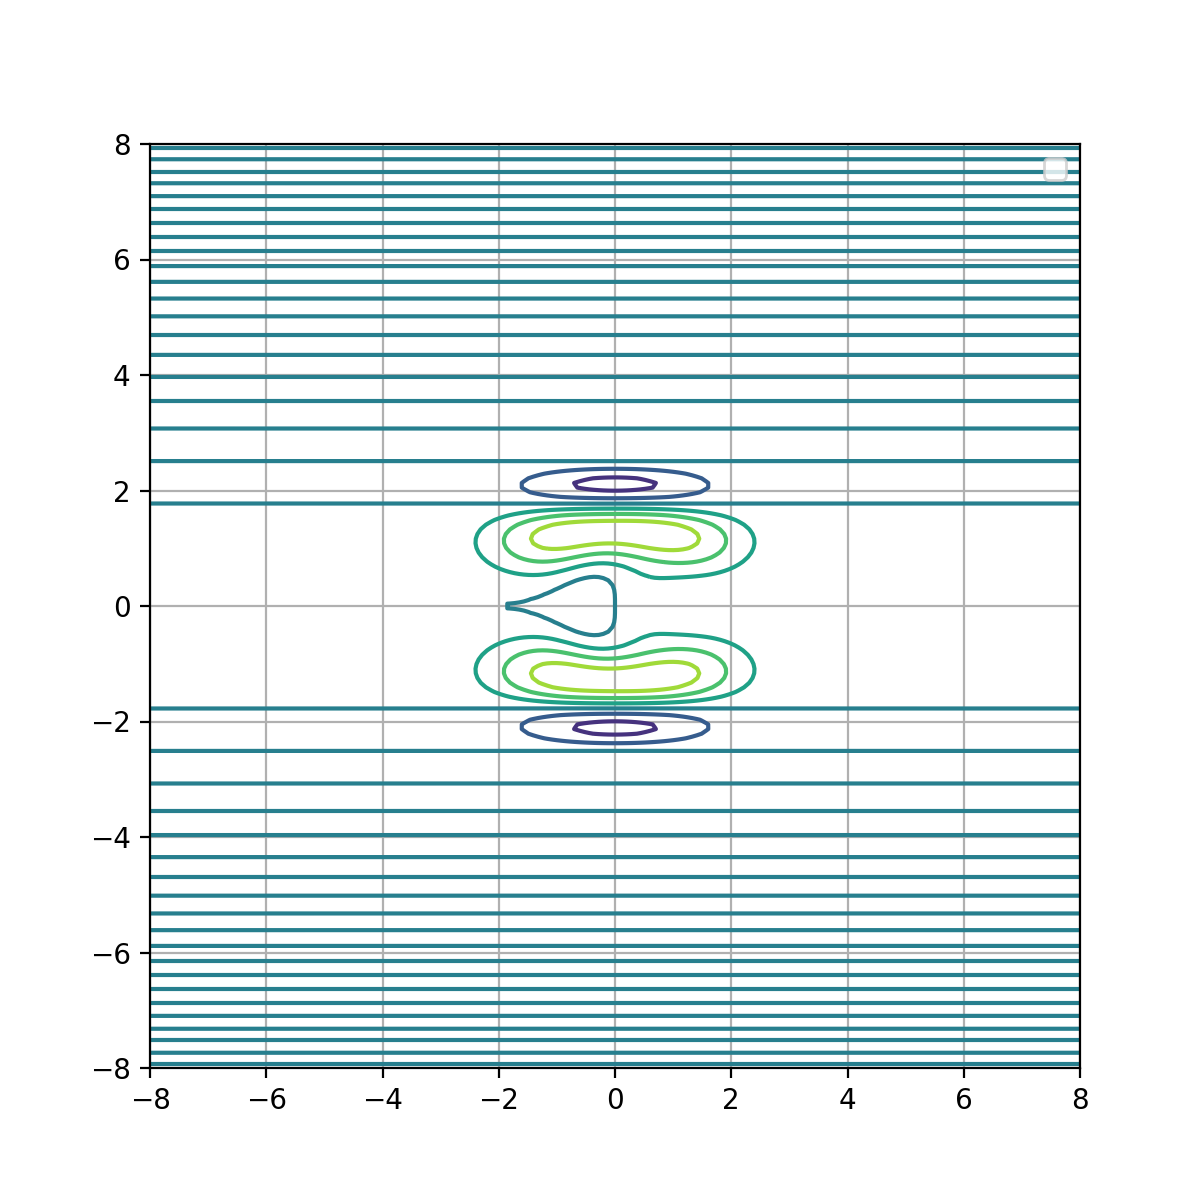

No handles with labels found to put in legend.


In [10]:
a = bk.ket( y*sp.exp(-2*(x**2 + y**2))/(1+.1*x**2) )
b = bk.ket( .1*(y**2+x**2)*sp.sin(x**2)*sp.exp(-.5*y**2 -.5*x**2))

bk.show(.1*a+2*b)

You are probably familiar with the inner product most commonly associated with Euclidean vectors, the <b>dot</b>-product:

In [11]:
a = bk.ket([1,0])
b = bk.ket([0,1])

a.bra@b # <- dot product (these are orthogonal so should be zero)

...but you may not be used with the notation used here. Let's have a look. For any ket:

In [12]:
a = bk.ket(y*sp.exp(-2*(x**2 + y**2))/(1+.1*x**2), name = "a")
a

we may define a bra:

In [13]:
a.bra

Whenever a bra runs into a ket on its right, they form a so called <b>bra-ket</b> - the inner product:

In [14]:
a.bra@a

The inner product is thus a mapping of two kets onto a complex number:
\begin{equation}
\langle a \vert b \rangle \in \mathbb{C}.
\end{equation}

<b>Hilbert space</b> is spanned by all square normalizeable functions in $\mathbb{R}^3$, 
\begin{equation}
\{f_n\} \hspace{1cm} f_n \in L^2,
\end{equation}
provided the inner product
\begin{equation}
\langle f \vert g \rangle := \int_{\mathbb{R}^3} f(\mathbf{r})^*g(\mathbf{r}) d\mathbf{r}.
\end{equation}

## Orthonormality - normality and orthogonality

Quantum mechanics deals with distributions evolving in time according to a wave equation. As would be the case with most waves, the distributions will then at some point oscillate between positive and negative values, thus calling for a different probability interpretation than the one we normally use.

Rather than having the distribution $P$ normalized to one over $\mathbb{R}^3$:
\begin{equation}
\int_{\mathbb{R}^3} P(\mathbf{x}) d\mathbf{x} = 1,
\end{equation}
we require our <i>wavefunction</i>, represented by $\vert \Psi \rangle$, to be square-normalized to one, meaning that

\begin{equation}
\langle \Psi \vert \Psi \rangle = 1
\end{equation}

Using BraketLab, we satistfy this condition by
\begin{equation}
\vert \Psi \rangle_{normalized} = \frac{1}{ \sqrt{\langle \Psi \vert \Psi \rangle} }\vert \Psi \rangle
\end{equation}
in the following way:

<IPython.core.display.Javascript object>


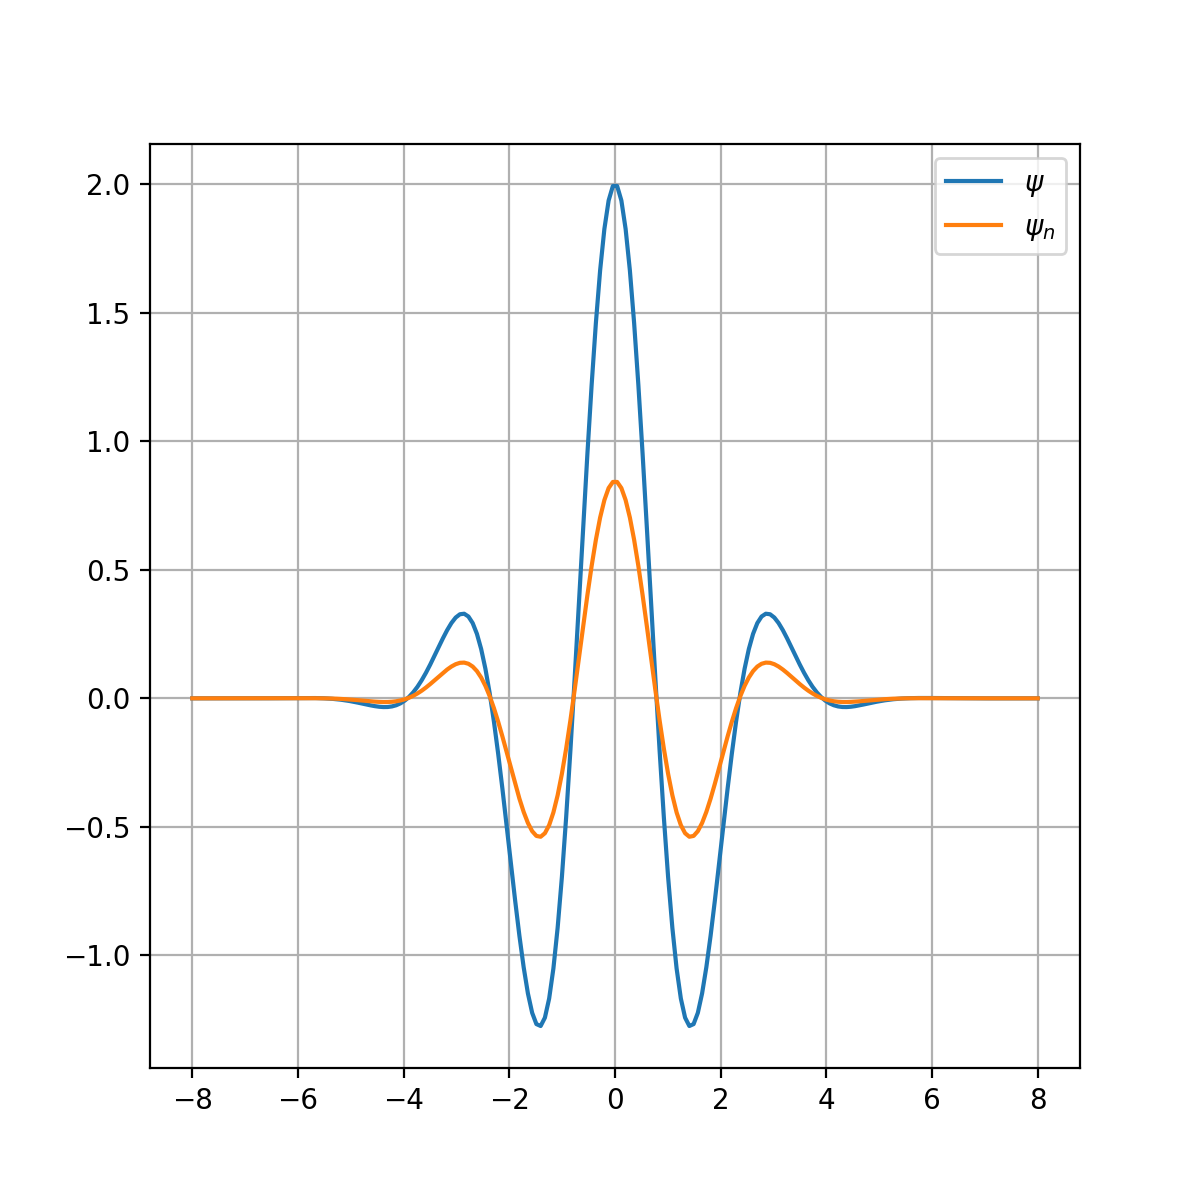

<psi   | psi  > =  5.605245682605472
<psi_n | psi_n> =  1.0


In [15]:
psi = bk.ket( 2*sp.cos(2*x) * sp.exp(-.2*x**2), name = "$\\psi$" ) # <- some ket in Hilbert space

psi_normalized = (psi.bra@psi)**-.5*psi #normalization

psi_normalized.__name__ = "$\\psi_n$"
bk.show(psi, psi_normalized)
print("<psi   | psi  > = ", psi.bra@psi)
print("<psi_n | psi_n> = ", psi_normalized.bra@psi_normalized)

Being <i>orthogonal</i> to another function does not neccessarily mean that they do not have regions where they are both non-zero:

<IPython.core.display.Javascript object>


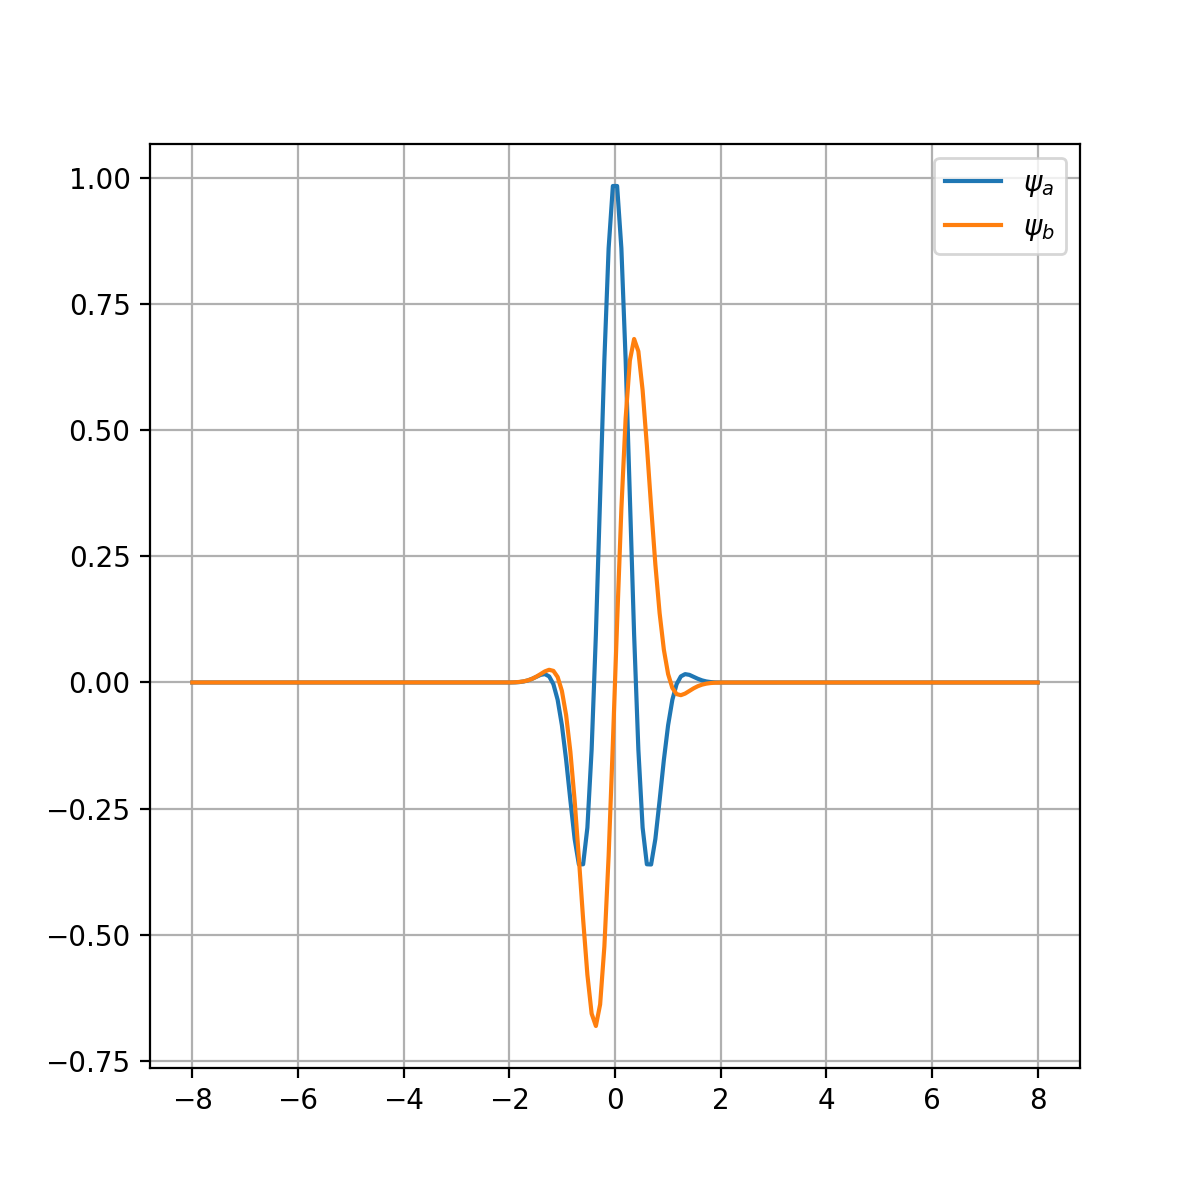

<psi_a | psi_b > =  0.0 (orthogonal)


In [16]:
psi_a = bk.ket( sp.cos(4*x) * sp.exp(-2*x**2), name = "$\\psi_a$" ) 
psi_b = bk.ket( sp.sin(3*x) * sp.exp(-2*x**2), name = "$\\psi_b$" ) 

bk.show(psi_a, psi_b)

print("<psi_a | psi_b > = ", psi_a.bra@psi_b, "(orthogonal)")

yet, we call integrals like the one above <i>overlap</i> integrals. You may be shocked to learn that quantum chemistry is more often than not carried out in a non-orthogonal basis where these are non-zero.

<div style="margin:0px">
<table style="margin:0px;width:100%;height:100%;">
<tr style="background-color:rgba(0, 0, 0, 0);width:100%">
<td>
<font size="3" >
<div class="alert alert-info" role="alert" align="left">
<h3>Behind the scenes</h3>
<p></p>
Inner products may be numerically estimated using a range of methods depending on the basis and the dimensionality. 
    
For 1D integrals, BraketLab in general utilize quadrature methods. In higher dimensions, the integrals are computed using a combination of zero-variance Monte-Carlo methods [1], including (1) importance sampling, (2) interpolated control variates and (3) coordinate transforms. Repeated calculations of identical quantities is avoided by using the <code>lru_cache</code> decorator.

In the long run, BraketLab will have basis-specific integrators, analytical and numerical, with fallback to multipurpose numerical methods where required. 
    
[1] Caffarel, M. (2019). <i>Evaluating two-electron-repulsion integrals over arbitrary orbitals using zero variance Monte Carlo: Application to full configuration interaction calculations with Slater-type orbitals.</i> The Journal of Chemical Physics, 151(6), 064101.
</div>
</td>
</tr>
</table>

## Outer products and operators

Kets can be combined in many ways. For instance, the product of two kets is a new ket in a space often called <a href="https://en.wikipedia.org/wiki/Liouville_space">Liouville space</a>:

<IPython.core.display.Javascript object>


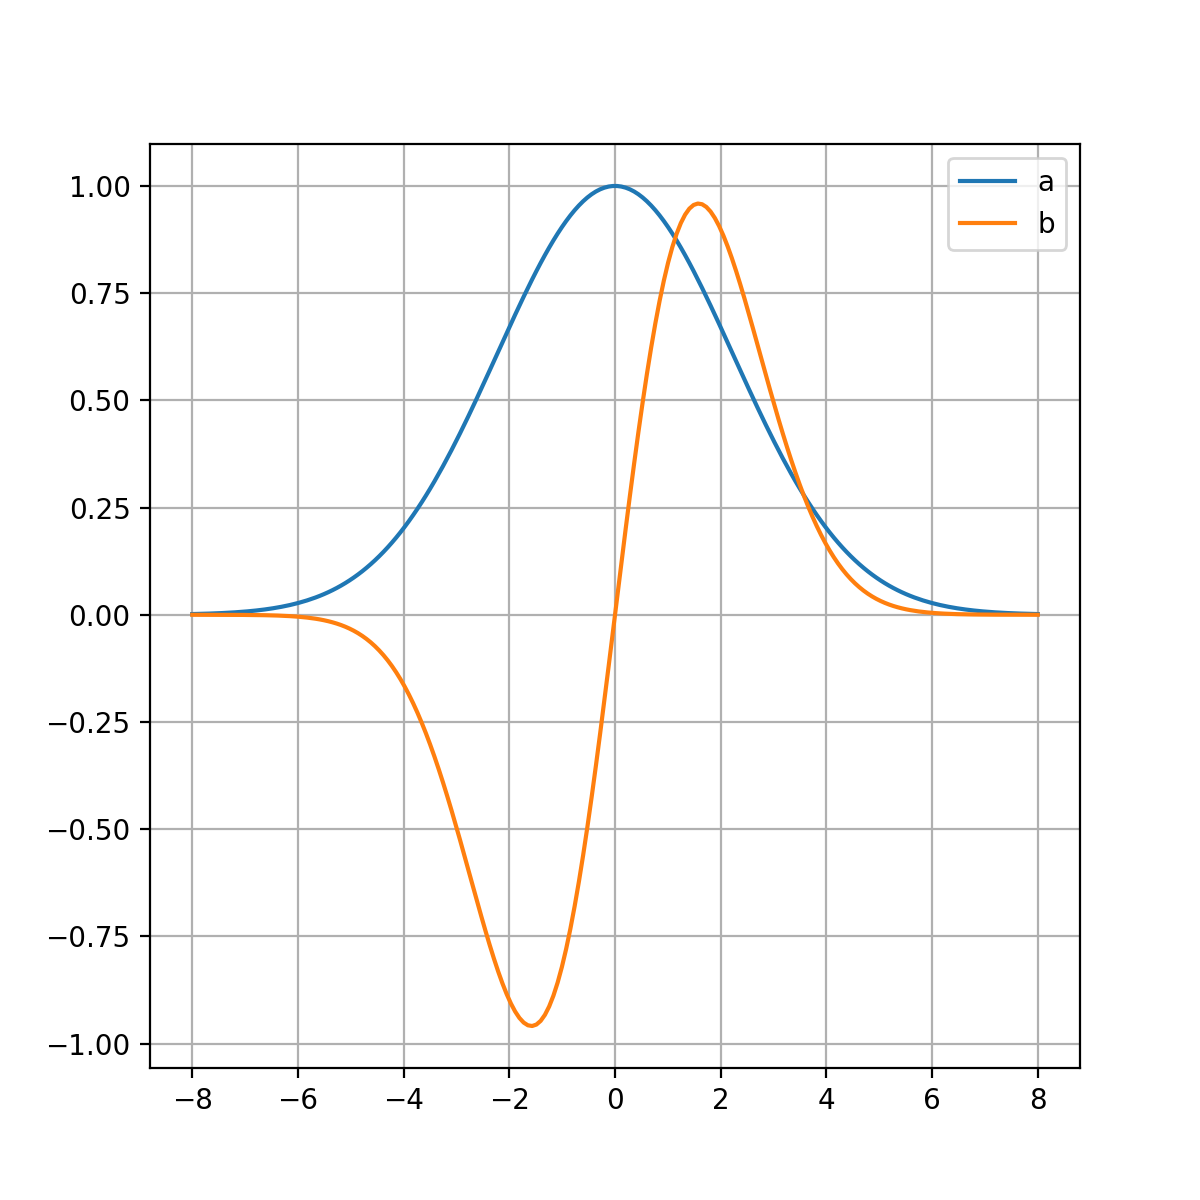

In [17]:
psi_a = bk.ket( sp.exp(-.1*x**2), name = "a")
psi_b = bk.ket( x*sp.exp(-.2*x**2), name = "b")
bk.show(psi_a, psi_b)

ab = psi_a@psi_b
ab

In [ ]:
bk.show(ab)

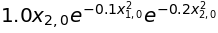

In [18]:
ab.ket_sympy_expression

In addition to familiar operations such as addition, subtraction, division and multiplication, kets may be acted upon by several other operators. You'll encounter such an operator if you happen to multiply a ket with a bra to its right, the so-called <i>mapping operator</i>:

In [19]:
a = bk.ket( sp.exp(-4*x**2), name = "a")
b = bk.ket( x*sp.exp(-6*x**2), name = "b")
a@b.bra

The trace of the mapping operator is called a projection operator:

In [20]:
bk.trace(a@b.bra)

Operators in general <i>act</i> on kets, resulting in new kets:
\begin{equation}
\hat{\Omega} \vert a \rangle = \vert b \rangle
\end{equation}

Many other operators are of interest in quantum mechanics, such as translation, differentiation, multiplication by a variable. 

Certain operators called <i>Hermitian operators</i> represent observable quantities in quantum mechanics. Operators are thus a cruical part of the algebra og quantum theory. Several operators are available in BraketLab, let's look at some of them:

<IPython.core.display.Javascript object>


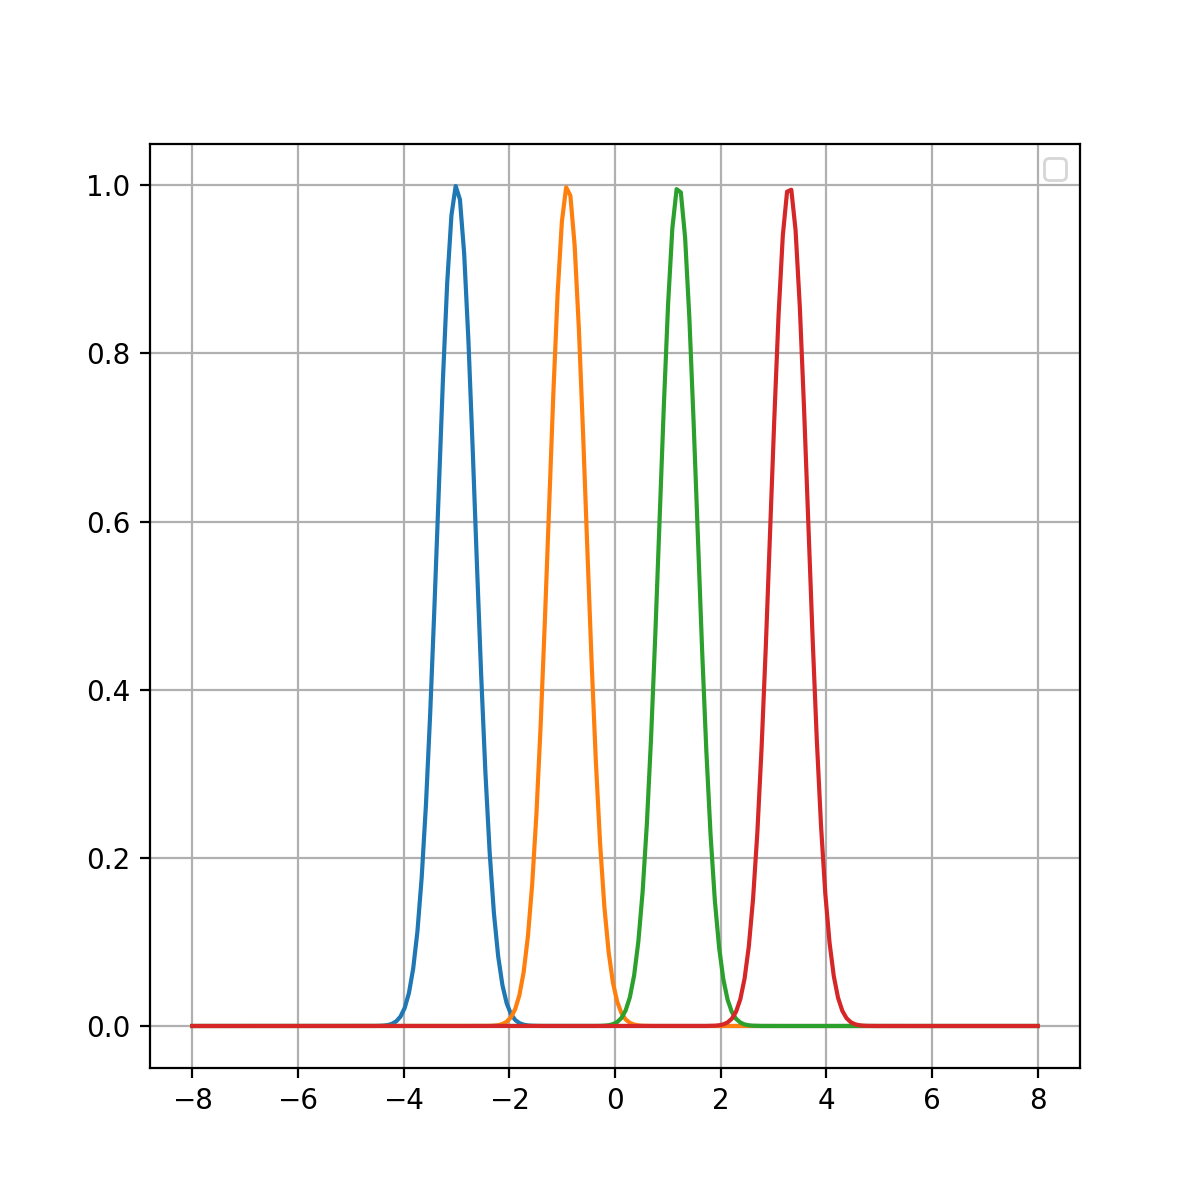

No handles with labels found to put in legend.


In [21]:
psi = bk.ket( sp.exp(-4*(x+3)**2))

T = bk.get_translation_operator(np.array([2.1]))

# Apply the translation operator one, two and three times
Tpsi = T*psi
TTpsi = T*T*psi
TTTpsi = T*T*T*psi

bk.show(psi, Tpsi, TTpsi, TTTpsi)

In [ ]:

a = bk.ket( sp.exp(-x**2), name = "a(x)")

D = bk.get_differential_operator(order = [1])

Da = D*a
Da.__name__ = "$\\frac{d}{dx} a(x)$"

bk.show(a, Da)

It generalizes to many dimensions:

<IPython.core.display.Javascript object>


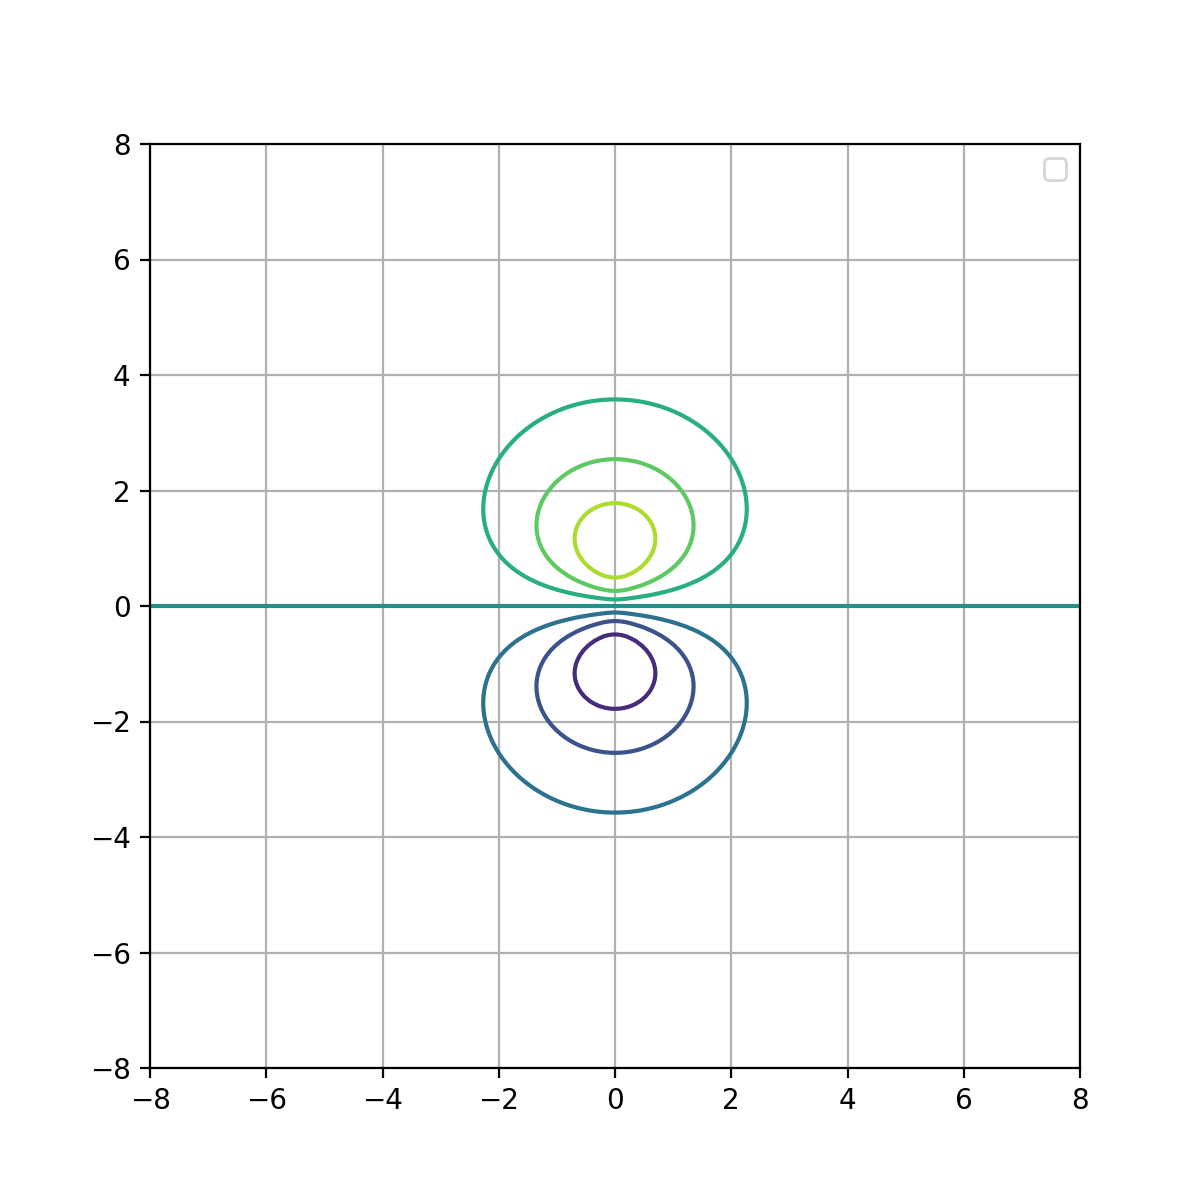

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


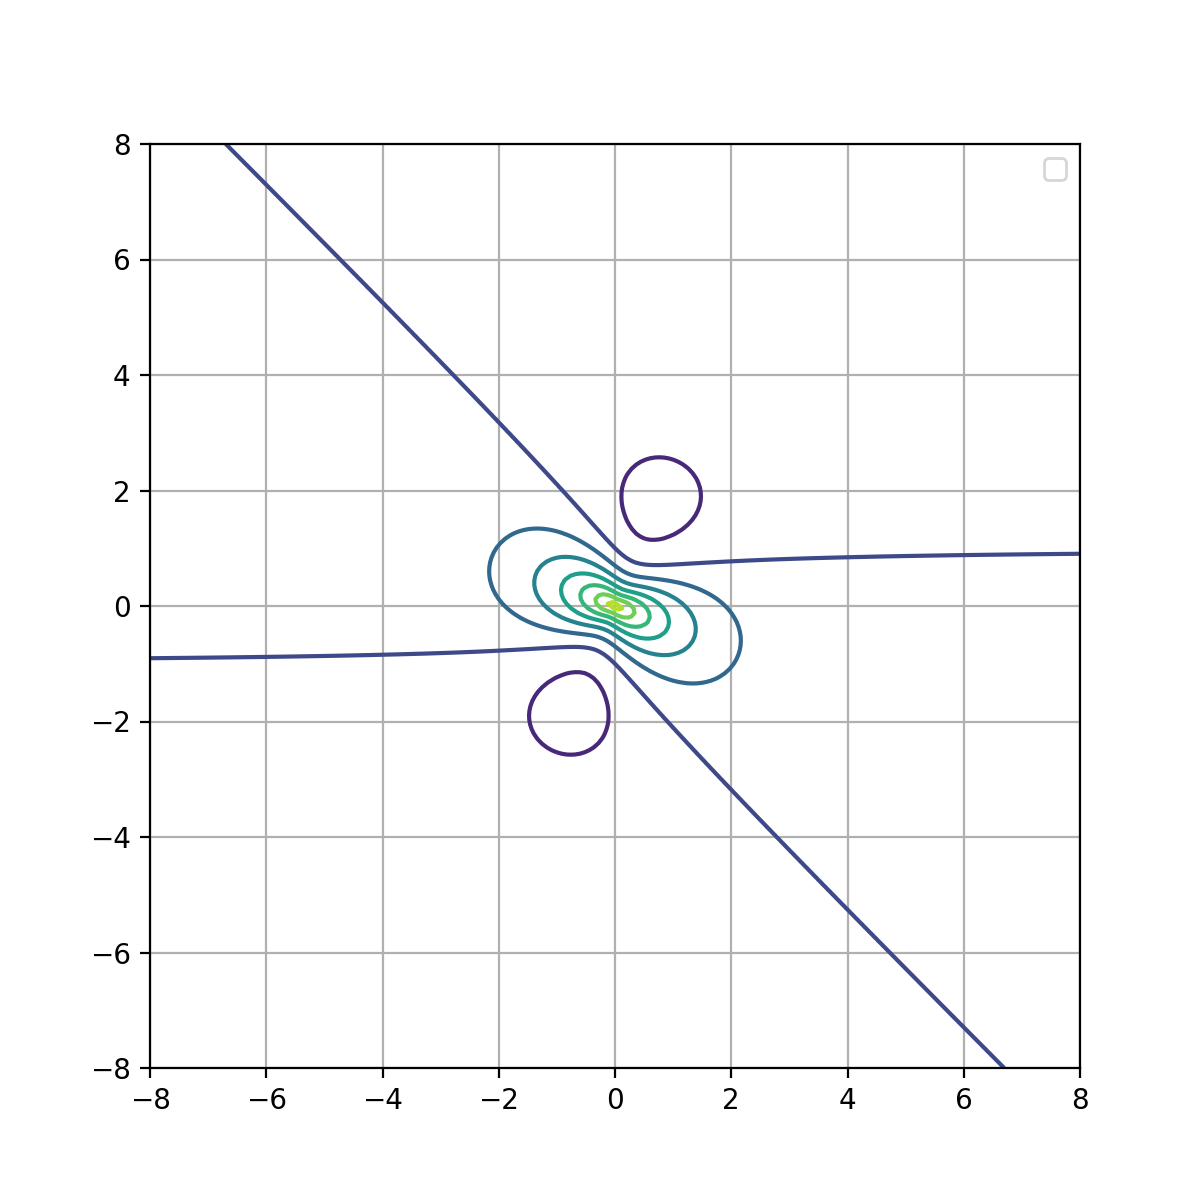

No handles with labels found to put in legend.


In [22]:

a = bk.ket( x*sp.exp(-(x**2 + y**2)**.5))

D = bk.get_differential_operator(order = [1,1])

D2a = D*a

bk.show(a)
bk.show(D2a)

The <i>Hamiltonian operator</i> of the electronic Hydrogen-equation is the Hermitian operator representing the energy of the Hydrogen system. It consists of the potential energy term:

In [23]:
V = bk.onebody_coulomb_operator()
V

and the kinetic term

In [24]:
T = bk.kinetic_operator()
T

Together, they describe the total energy of the electron in the Hydrogen atom, which in textbooks is introduced as the time-independent Schrödinger equation. Operators, like matrices, have eigenfunctions and eigenvalues. For Hermitian operators, the eigenfunctions and eigenvalues constitute the possible outcomes of measurements. 

The eigenfunctions of the Hydrogen-atom are the so-called spherical harmonics multiplied with a radial factor:

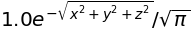

In [25]:
n,l,m = 1,0,0

psi_0 = bk.basisbank.get_hydrogen_function(n,l,m)
psi_0.get_ket_sympy_expression()

We can of course verify that they are eigenfunctions, in which case they should be proportional to eachother:

In [26]:
x_,y_,z_ = np.random.uniform(-1,1,(3,30))

Hpsi_0 = V*psi_0 + T*psi_0

Hpsi_0(x_,y_,z_)/psi_0(x_,y_,z_)

array([-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
       -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5])

...and the factor of proportionality is the eigenvalue. The eigenvalue is in this case the ground state energy, confirmed by computing $\langle H \rangle = \langle \psi_0 \vert \hat{H} \vert \psi_0 \rangle $

In [27]:
print("E_0 = %.2f Hartrees" % (psi_0.bra@(V*psi_0) + psi_0.bra@(T*psi_0)))

E_0 = -0.50 Hartrees


Other functions does not satisfy this proportionality for Hydrogen, albeit the energy may not be too far off:

In [28]:
x,y,z = sp.symbols("x y z")

psi_trial = bk.ket( sp.exp(-.5*(x**2 +y**2 + z**2)) )
psi_trial = (psi_trial.bra@psi_trial)**-.5*psi_trial #normalize
print("E_0 = %.2f Hartrees" % (psi_trial.bra@(V*psi_0) + psi_trial.bra@(T*psi_0)))

Hpsi_trial = V*psi_trial + T*psi_trial

Hpsi_trial(x_,y_,z_)/psi_trial(x_,y_,z_)

E_0 = -0.47 Hartrees


array([-9.66211599e-02, -1.15324330e-02, -1.22489775e-01, -1.20944654e-05,
       -5.30269528e-01, -7.13464843e-02, -3.02303154e-02, -6.25952933e-02,
       -2.23661820e-03, -1.76973885e-01, -1.27788331e-01, -5.77483177e-02,
       -9.47019697e-01, -5.88328577e-04, -3.37619000e-02, -8.76746778e-02,
       -1.30931799e-02, -2.02789964e-03, -3.71609045e-01, -4.22768350e-03,
       -3.96574476e-03, -3.59249265e-01, -6.56506937e-01, -2.08083190e-01,
       -1.52547550e-02, -2.26777359e-03, -6.20502256e-02, -1.48314089e-02,
       -5.50284146e-01, -3.56836921e-01])

<div style="margin:0px">
<table style="margin:0px;width:100%;height:100%;">
<tr style="background-color:rgba(0, 0, 0, 0);width:100%">
<td>
<font size="3" >
<div class="alert alert-info" role="alert" align="left">
<h3>Behind the scenes</h3>
<p></p>
With BraketLab, you'll surf through Hilbert-space on the joint power of <a href="https://www.sympy.org/en/index.html">sympy</a> and <a href="https://numpy.org/">numpy</a>. Analytical derivation is easily performed with sympy, whereby integrals are computed numerically. In this sense, BraketLab is simply a wrapping of this two excellent modules into a framework very similar to what you would find in a book on quantum theory.
</div>
</td>
</tr>
</table>

Eigenfunctions of system-specific Hamiltonians are generally called <i>stationary states</i>, and while their mathematical formulations may be intimidating, we mostly look them up in tables (or generate them on the fly) when we need them. For Hydrogen, these are:

<IPython.core.display.Javascript object>


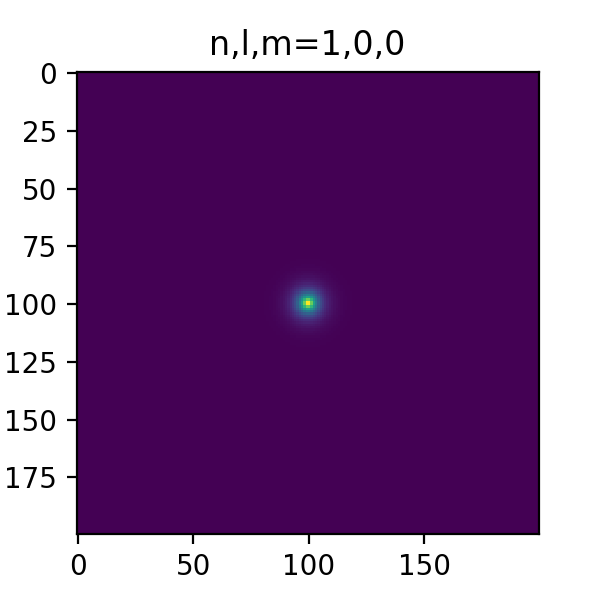

<IPython.core.display.Javascript object>


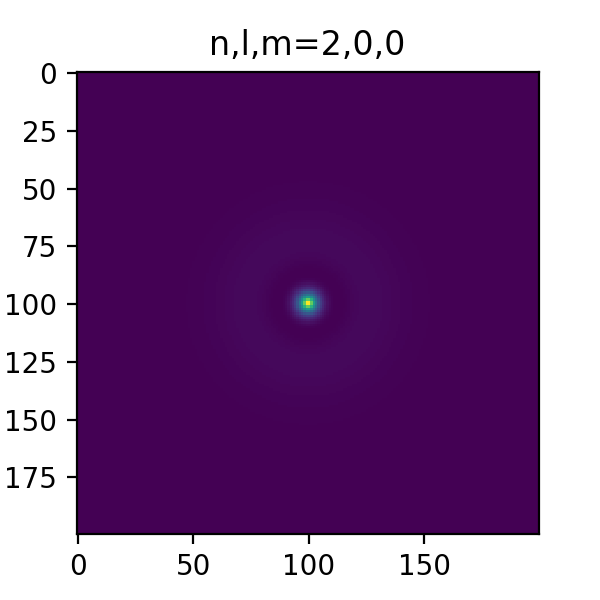

<IPython.core.display.Javascript object>


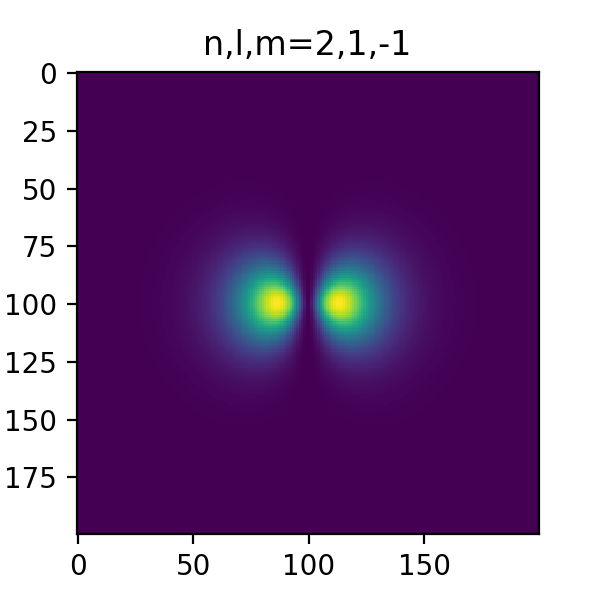

<IPython.core.display.Javascript object>


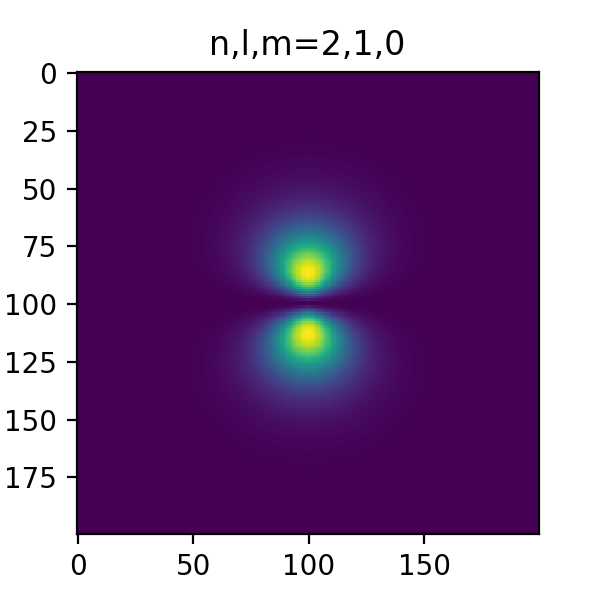

<IPython.core.display.Javascript object>


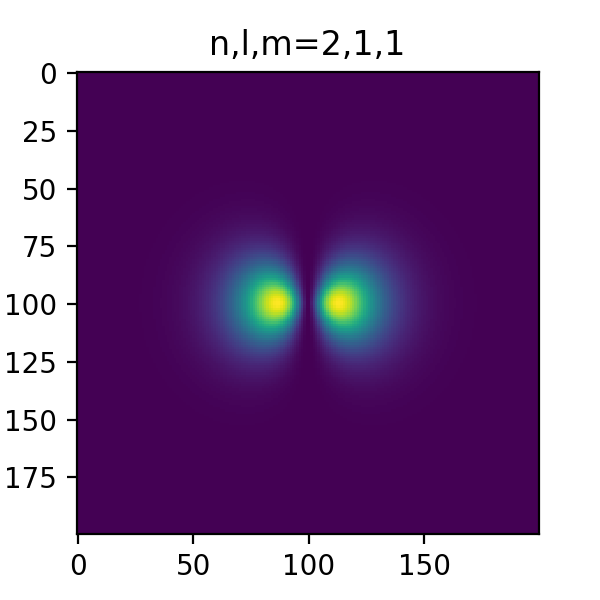

<IPython.core.display.Javascript object>


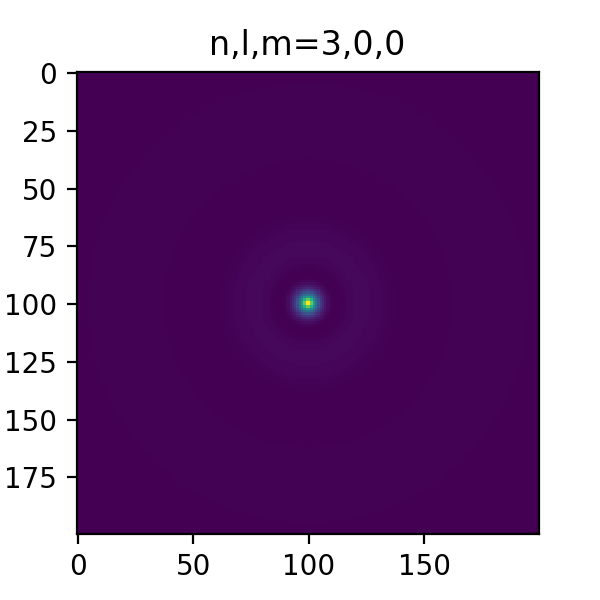

<IPython.core.display.Javascript object>


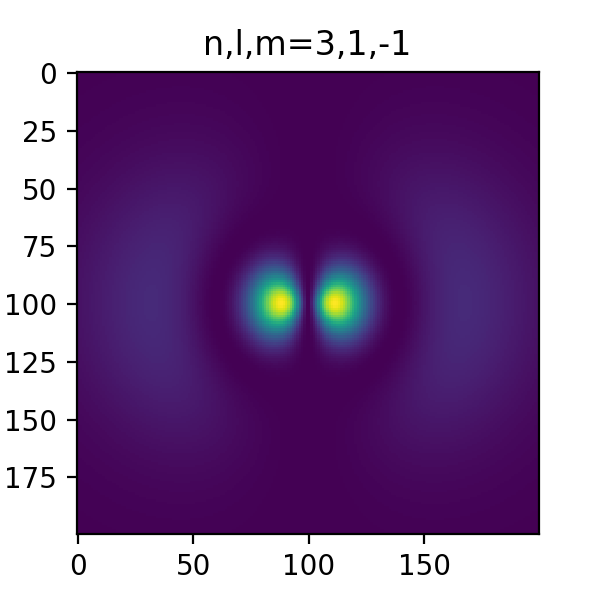

<IPython.core.display.Javascript object>


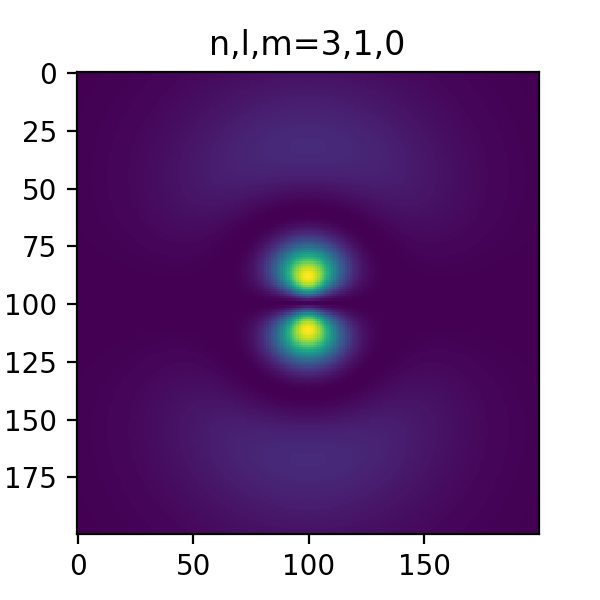

<IPython.core.display.Javascript object>


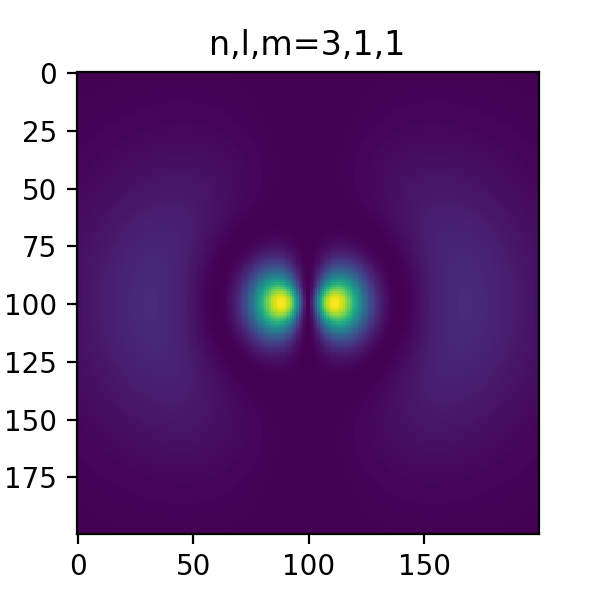

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


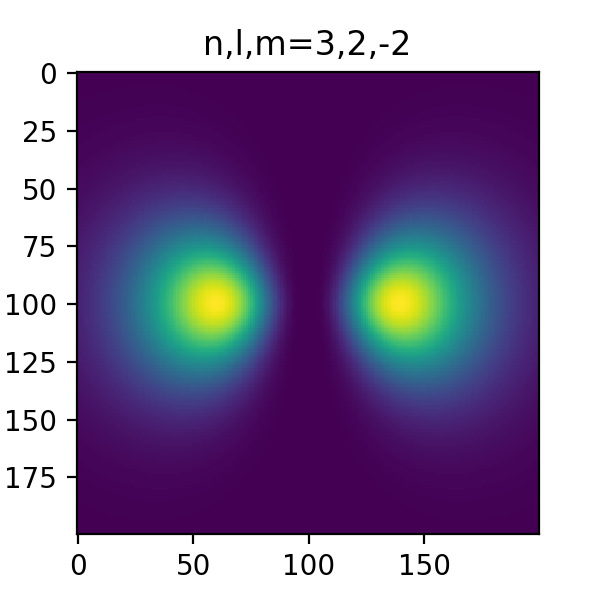

<IPython.core.display.Javascript object>


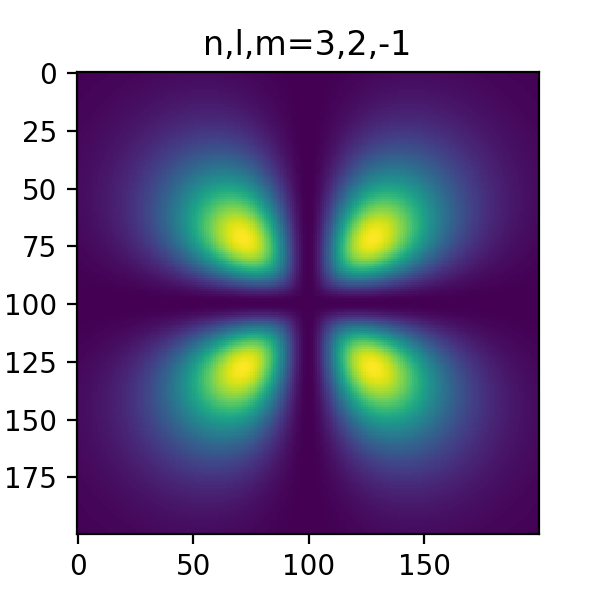

<IPython.core.display.Javascript object>


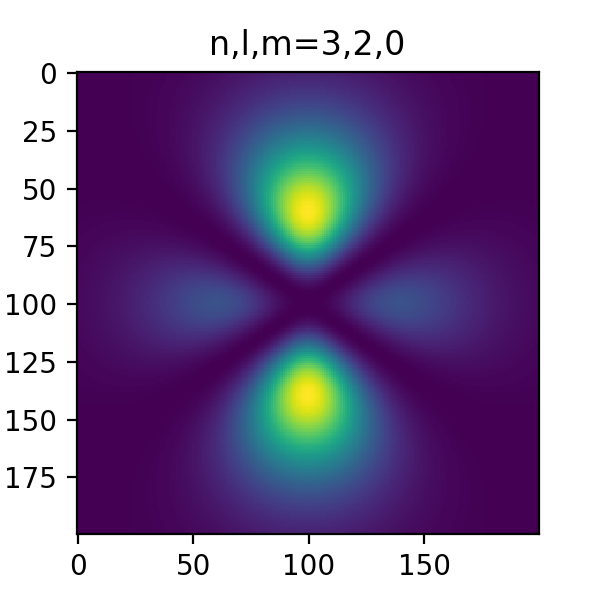

<IPython.core.display.Javascript object>


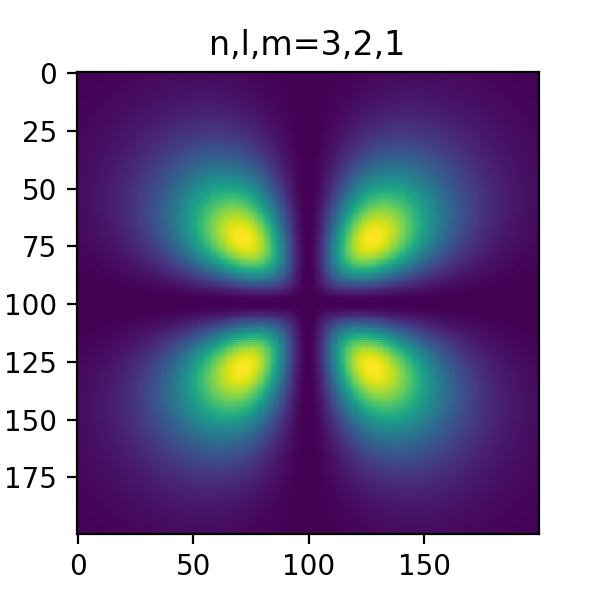

<IPython.core.display.Javascript object>


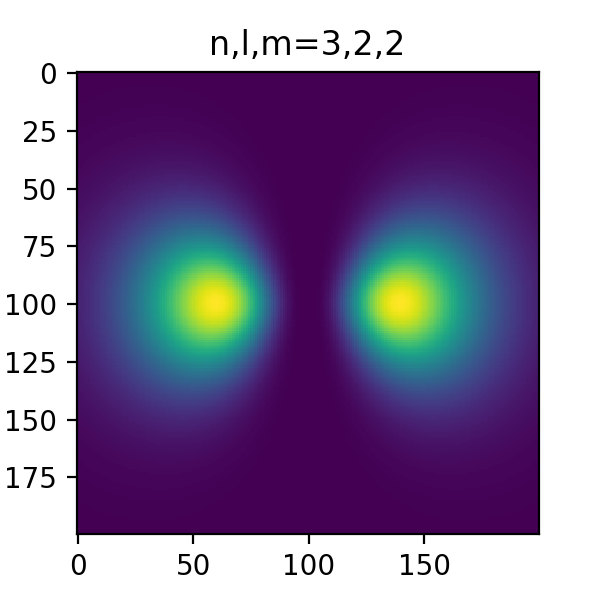

In [29]:
Nt = 200
t = np.linspace(-1,1,Nt)*15
for n in range(1,4):
    for l in range(n):
        for m in range(-l, l+1):
            psi_nlm = bk.basisbank.get_hydrogen_function(n,l,m)
            px = psi_nlm(t[:, None],t[None, :], .0*np.random.uniform(-1,1,(Nt,Nt)))
            p = (np.conjugate(px)*px).real
            plt.figure(figsize = (3,3))
            plt.imshow(p)
            plt.title("n,l,m=%i,%i,%i" % (n,l,m))
            plt.show()

## Superposition

With a complete basis, we may resolve the identity of any function in this basis by <i>projection</i>. 

For instance, the quantum harmonic oscillator has eigenfunctions in the shape of sinusoids enveloped by gaussians: 

/opt/anaconda3/lib/python3.7/site-packages/braketlab/braketlab.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


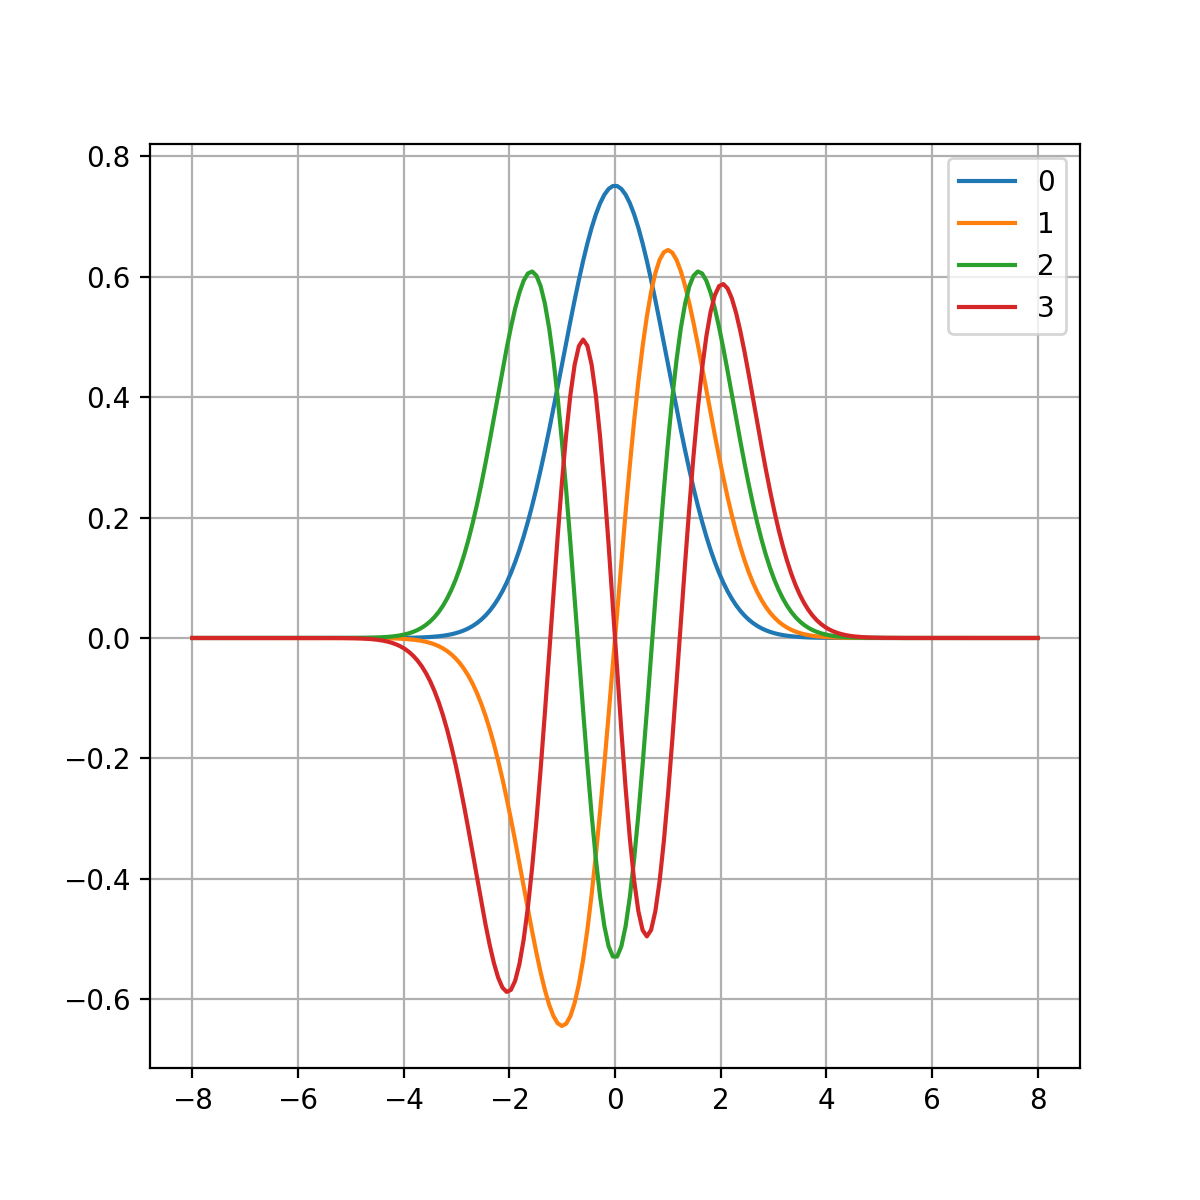

In [30]:
bk.show( bk.basisbank.get_harmonic_oscillator_function(0),
         bk.basisbank.get_harmonic_oscillator_function(1),
         bk.basisbank.get_harmonic_oscillator_function(2),
         bk.basisbank.get_harmonic_oscillator_function(3),
       )

If we conjure up another function, not present in this basis and slightly offset from the basis centre:

<IPython.core.display.Javascript object>


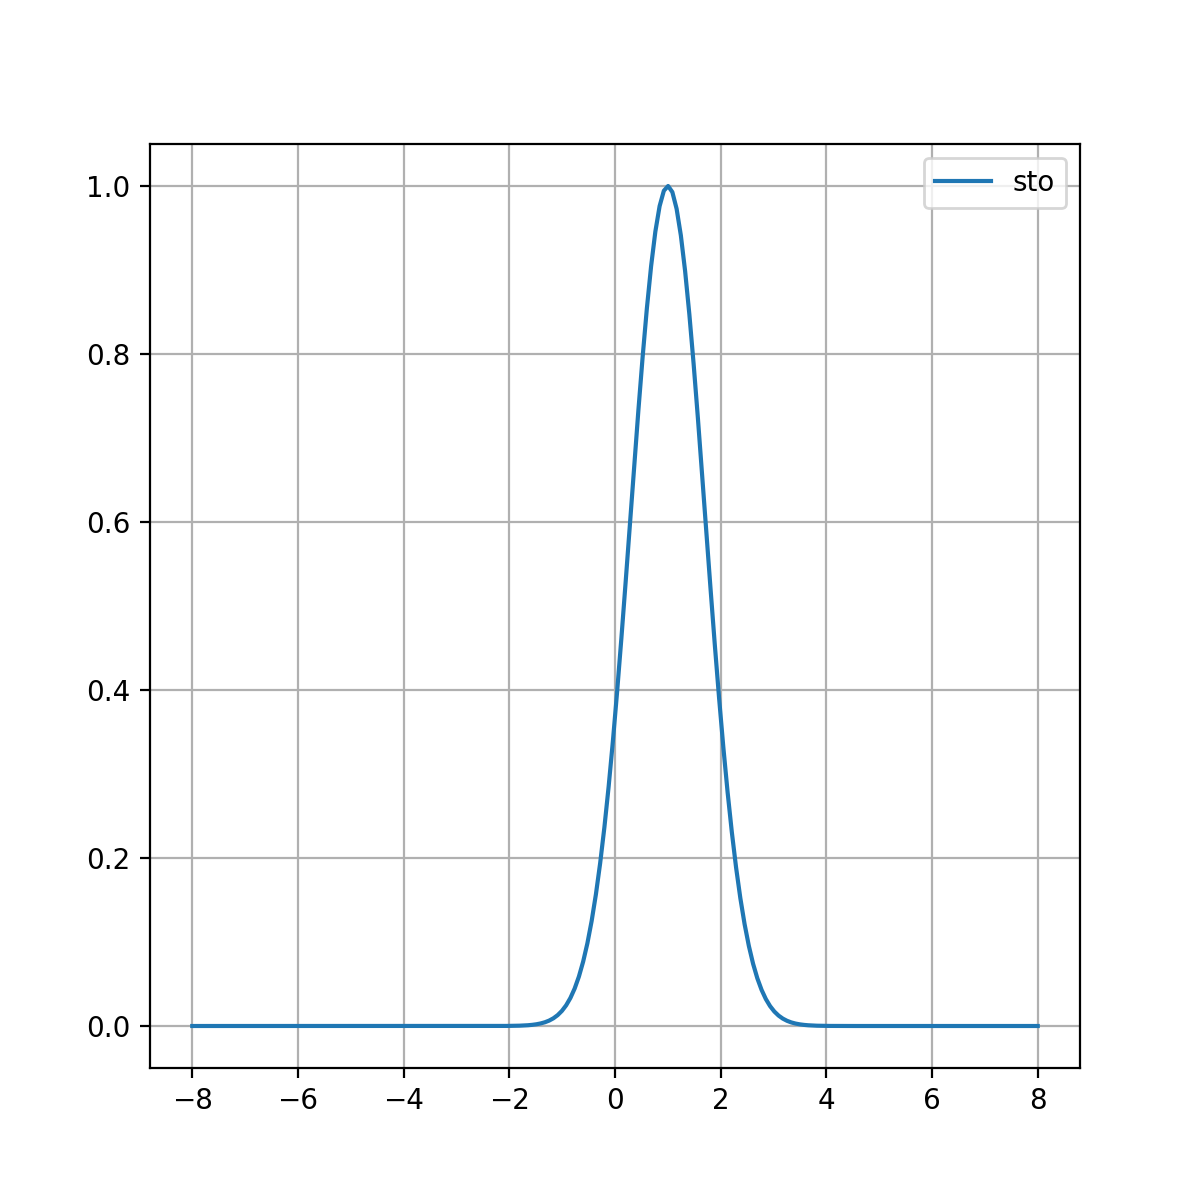

In [31]:
psi_sto = bk.ket( sp.exp( - ((x-1)**2) ) , name = "sto")
bk.show(psi_sto)

...the Harmonic oscillator eigenbasis is <i>complete</i>, meaning that with sufficiently many functions, <i>any</i> other L2-function can be represented as a linear combination / superposition of states by projection:

<IPython.core.display.Javascript object>


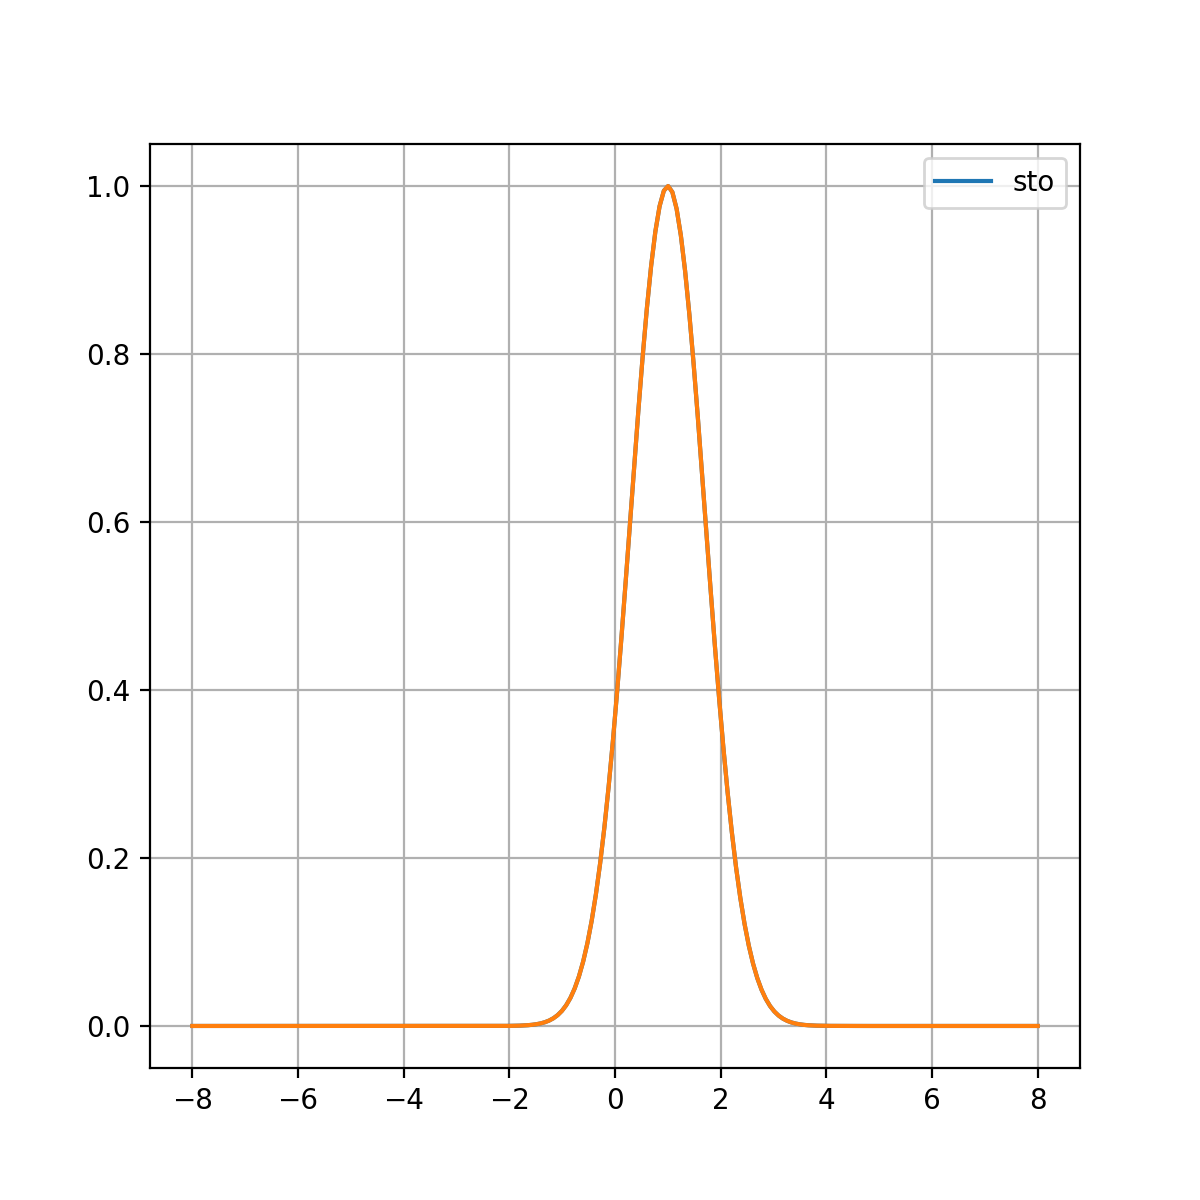

In [32]:
p = bk.basisbank.get_harmonic_oscillator_function(0)
for i in range(1,15):
    p += bk.basisbank.get_harmonic_oscillator_function(i)
    
P = bk.trace(p@p.bra) # <- form a projection operator

psi_ho = << #<- project psi_sto onto the HO-basis

bk.show(psi_sto, psi_ho) #<- compare the original to the projection

(<i>Notice, however, how poorly the gaussians manage to capture the pointy peak, or "cusp" of the exponential function. This is a well-known issue which has stuck with quantum chemistry ever since the 1950s when Boys introduced Gaussian type orbitals in place of Slater type orbitals, which in turn was introduced in the 1930s in order to avoid complications with the radial part of the hydrogen-solution.</i>)

## Time evolution

As time progresses, the function will evolve as a wave in the potential of the harmonic oscillator. With the known eigenbasis and eigenvalues of the Harmonic Oscillator, we may now watch what happens as time starts to flow:

/opt/anaconda3/lib/python3.7/site-packages/braketlab/animate.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.fig, self.ax = plt.subplots()


<IPython.core.display.Javascript object>


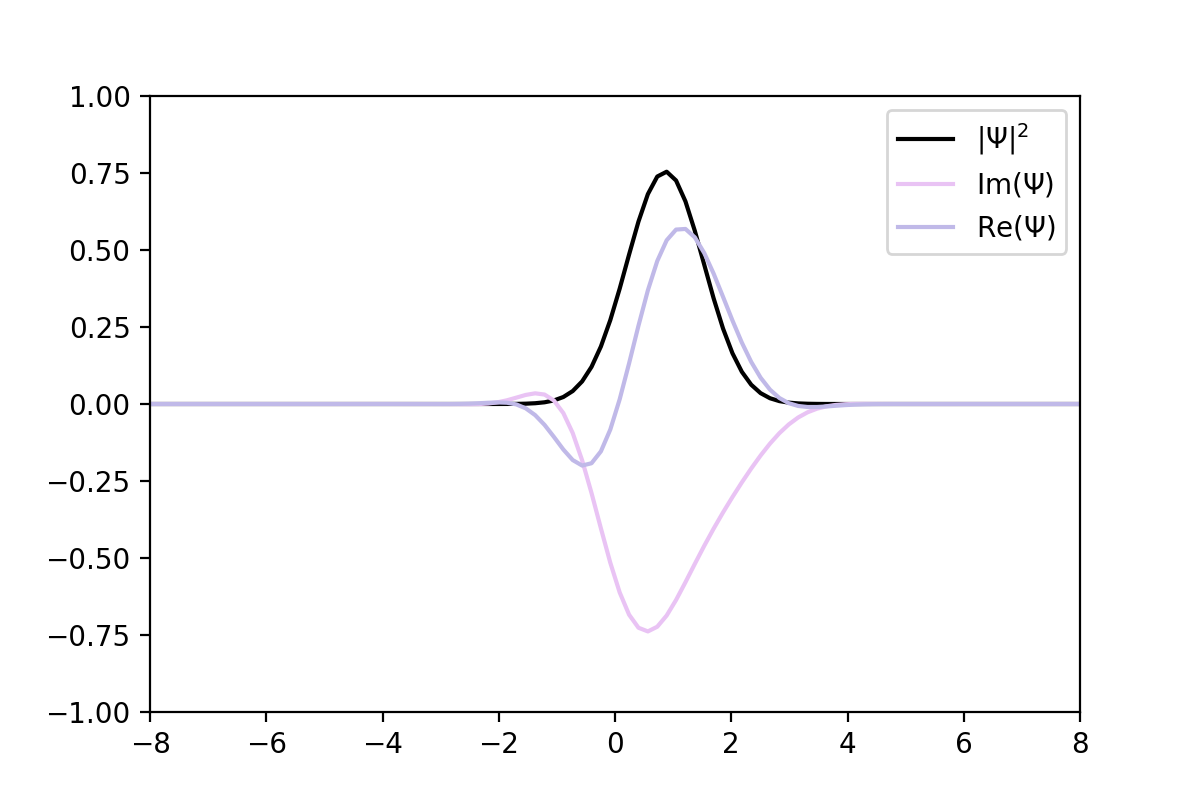

In [33]:
psi_ho.run(dt = 0.02)

What happens here is that the full solution evolves according to:
\begin{equation}
\vert \Psi(x,t) \rangle = \sum_n \vert \psi_n(x) \rangle c_n e^{-i\frac{E_n}{\hbar}t},
\end{equation}
as we expect for a time-independent potential.

## Measurement

Measuring stuff in quantum mechanics consists of projecting the wavefunction into the basis of the eigenfunctions of the Hermitian operator being observed:
\begin{equation}
\vert \Psi \rangle_{\Omega} = \big{(} \sum_i \vert i \rangle \langle i \vert \big{)} \vert \Psi \rangle = \sum_i \vert i \rangle \langle i \vert \Psi \rangle = \sum_i \vert i \rangle c_i,
\end{equation}
where the square of the coefficients $\vert c_i \vert^2$are interpreted as the probability of finding the system in the corresponding state.

BraketLab (do not yet fully) support measurement of the kets, for instance position:

In [ ]:
ms = psi_ho.measure(repetitions = 1000)

In [ ]:
ns, bins = np.histogram(ms)
bins = .5*(bins[1:] + bins[:-1])
plt.figure()
plt.plot(bins, ns, ".")
plt.show()

<div style="margin:0px">
<table style="margin:0px;width:100%;height:100%;">
<tr style="background-color:rgba(0, 0, 0, 0);width:100%">
<td>
<font size="3" >
<div class="alert alert-info" role="alert" align="left">
<h3>Behind the scenes</h3>
<p></p>
A given Hermitian operator may be measured on a ket by providing it's eigenbasis to the measurement-method of the ket. Note that this is not fully implemented yet. Currently, when calling the measurement method, a Metropolis-Hastings random walk is performed in the probability distribution of choice (discrete in the case of a finite eigenbasis). By default, a measurement corresponds to measuring the position.
</div>
</td>
</tr>
</table>

## Atoms and molecules 

From a quantum perspective, many-electron atoms may be seen as pertubed version of the Hydrogen atom. More electrons entering the system furthermore shifts us away from the Hydrogen-like solutions. Beyond atoms, we may consider molecules as perturbed versions of atoms. This motivates us to explore many-body quantum physics through the lens of independent particles, combined with the variational principle, stating that any trial wavefunction yields an upper estimate of the ground state energy of the system in question:
\begin{equation}
E_0 \leq \frac{\langle \Psi_{trial} \vert \hat{H} \vert \Psi_{trial} \rangle}{\langle \Psi_{trial} \vert \Psi_{trial} \rangle}
\end{equation}

Just keep in mind that the further away from the the hydrogen-case we move, the less reliable estimate is provided from the hydrogenlike, single-particle picture.

Helium is a famous case, which was close to perfectly solved for by Egil Hylleraas at the golden age of quantum physics almost a hundred years ago. The problem illustrates the many facets of the role of electronic correlation in quantum chemistry (see for instance Tew, D. P., Klopper, W., & Helgaker, T. (2007). <i>Electron correlation: The many‐body problem at the heart of chemistry.</i> Journal of computational chemistry, 28(8), 1307-1320.)

The Hamiltonian of Helium is (in atomic units, i.e. 
$\hbar = 4 \pi \epsilon_0 = m_e = q_e = 1$):
\begin{equation}
\hat{H} = -\frac{1}{2} \big{(} \nabla_1^2 + \nabla_2^2 \big{)} - \frac{2}{r_1} - \frac{2}{r_2} + \frac{1}{r_{12}}
\end{equation}
The ground state energy has been experimentally determined to be about -2.9 Hartrees. 

In the spirit of our current discussion, let's check how close we may get with a product of the Hydrogen-functions:
\begin{equation}
\vert \Psi_{trial} \rangle = \vert \psi_{h,0} \rangle \otimes \vert \psi_{h,0} \rangle
\end{equation}

If we neglect the two-body term, we can compute the remaining contributions with BraketLab in the following way:

In [ ]:
psi_0 = bk.basisbank.get_hydrogen_function(1,0,0)

E = 0

# both contributions to the kinetic energy
E_kin = psi_0.bra@(bk.kinetic_operator()*psi_0) * 2

# both contributions to the potential energy from the core
Z = 2
E_nuc = psi_0.bra@(bk.onebody_coulomb_operator()*psi_0) * Z * 2

print("E_0 < %.2f Hartrees" % (E_kin + E_nuc), " ( with inter-electronic repulsion neglected)")

Not surprisingly, our energy is below the experimental result, because we neglected the repulsion between the electrons. It is actually twice what we would find for a ionized Helium atom with only one electron. Let's now add the inter-electronic contribution (but be a bit patient, this is a 6-dimensional integral):

In [ ]:
psi_he = psi_0@psi_0 #the product wavefunction

E_vv = psi_he.bra@(bk.twobody_coulomb_operator()*psi_he)

print("E_0 < %.2f Hartrees" % (E_kin + E_nuc + E_vv), " ( with inter-electronic repulsion included)")

We are now quite deep into it, so you may wonder what is going on here. Notice what happened to the variables of the ket-ket product function:

In [ ]:
psi_he.ket_sympy_expression

This function in Liouville space now describes the state of two electrons. When acting on this ket, the twobody Coulomb operator produces a new ket:

In [ ]:
Jpsi_he = bk.twobody_coulomb_operator()*psi_he
Jpsi_he.ket_sympy_expression

Now the inner product includes also division by the distance between the integration coordinates of electron one and two. In general many-body quantum theory, these kinds of integrals are known as two-particle integrals, while in quantum chemistry they are mostly referred to as electron repulsion integrals (ERIs for short). BraketLab can deal with these implicitly as above, or explicitly as follows:

In [ ]:
bk.eri_mci(psi_0, psi_0, psi_0, psi_0)

In turn, this facilitates a very modular approach to implementing traditional quantum chemistry methods such as Hartree-Fock or DFT (if you have the time to wait for the integrals). It furthermore allows for thinking outside of the box of independent particles, gaussian type orbitals and slater determinants, which is why I have called BraketLab out-of-the-box outside-of-the-box thinking. 

It's out-of-the-box since you may simply do

In [ ]:
pip install braketlab

...to get it on your home computer. The outside-of-the-box-thinking-part is up to you, but there are not many confines here (*) so feel free to explore. I'd love to get your feedback and proposals for features, just keep in mind that this is a work in progress. Thank you for your attention!

(*) Yet, many bugs and missing features.

(By the way, also check out <a href="https://github.com/audunsh/bubblebox">BubbleBox</a> for learning molecular dynamics and thermodynamics)